In [1]:

import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from pandas.tools.plotting import radviz
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
iris_df = pd.read_csv('/home/marcburt/Documents/School/Kaggle/iris_set/iris/Iris.csv')

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


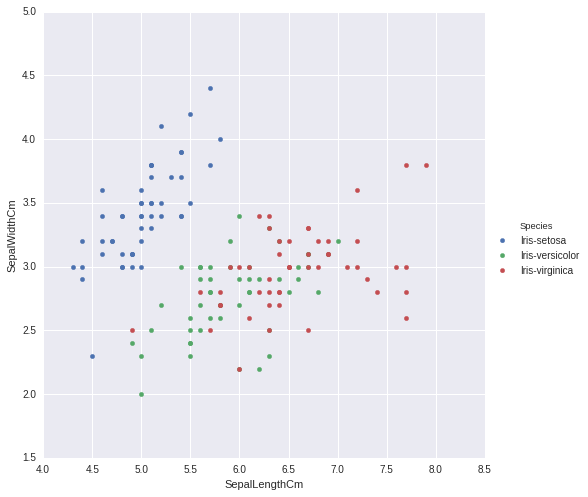

In [5]:
sns.FacetGrid(iris_df, hue = 'Species', size = 7).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

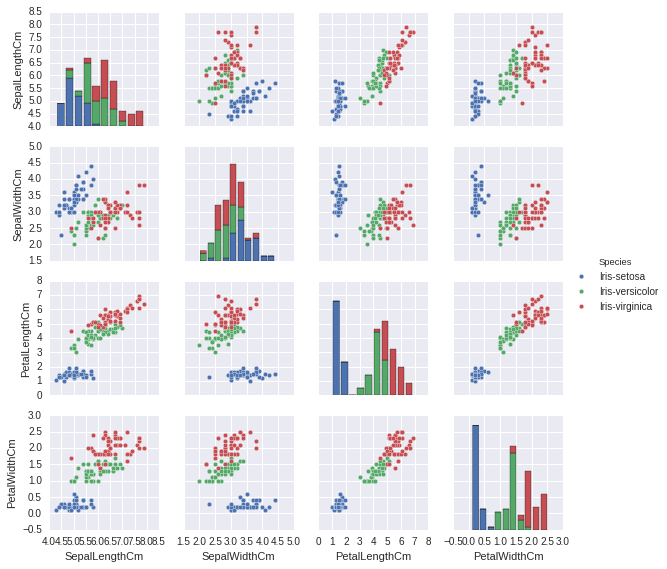

In [6]:
sns.pairplot(iris_df.drop('Id', axis =1), hue='Species', size=2)

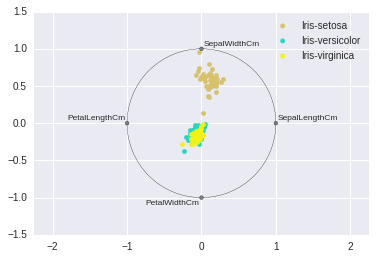

In [7]:
radviz(iris_df.drop('Id', axis = 1), "Species")

In [8]:

iris_map = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
iris_df = iris_df.replace({'Species': iris_map})

In [9]:
X = iris_df.as_matrix(columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
y = np.array(iris_df['Species'])

In [10]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .50)

In [12]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
y_pred = knn.predict(X_test)

In [14]:
accuracy_score(y_pred, y_test)

0.94666666666666666